In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [14]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
df['overweight'] = (df['weight'] / ((df['height']/100) ** 2) > 25).astype(int)

### Notice: If you write:

In [5]:
# bmd = df['weight'] / ((df['height']/100) ** 2)
# if bmd > 25:
#     df['overweight'] = 1
# else:
#     df['overweight'] = 0

you get the error ValueError: The truth value of a Series is ambiguous occurs because you’re trying to use a conditional statement on a pandas Series object, which can contain multiple items. In Python, an if statement expects a single boolean value, not a Series of values.

When you write if bmd > 25:, you’re actually comparing every element in the bmd Series to 25, which results in another Series of boolean values (True or False for each comparison). Python doesn’t know how to handle a Series of booleans in an if statement because it’s not clear whether you want the condition to be True if all values are True, if any value is True, or some other logic.

To fix this, you should use vectorized operations that are designed to work with pandas Series. Here’s how you can modify your code to correctly create the ‘overweight’ column:

In [16]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [7]:
# # Add 'overweight' column
# bmd = df['weight'] / ((df['height']/100) ** 2)
# df['overweight'] = np.where((bmd > 25), 1, 0)

# df.head()

In [17]:
df['cholesterol'] = np.where((df['cholesterol'] == 1), 0, 1)
df['gluc'] = np.where((df['gluc'] == 1), 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### How to use pd.melt function, an example

In [9]:
# import pandas as pd

# # Create a simple DataFrame
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie'],
#     'Age': [25, 30, 35],
#     'City': ['New York', 'Los Angeles', 'Chicago']
# }
# df = pd.DataFrame(data)

# # Display the original DataFrame
# print("Original DataFrame:")
# print(df)

# # Use pd.melt to reshape the DataFrame
# melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Age', 'City'], var_name='Attribute', value_name='Value')

# # Display the melted DataFrame
# print("\nMelted DataFrame:")
# print(melted_df)


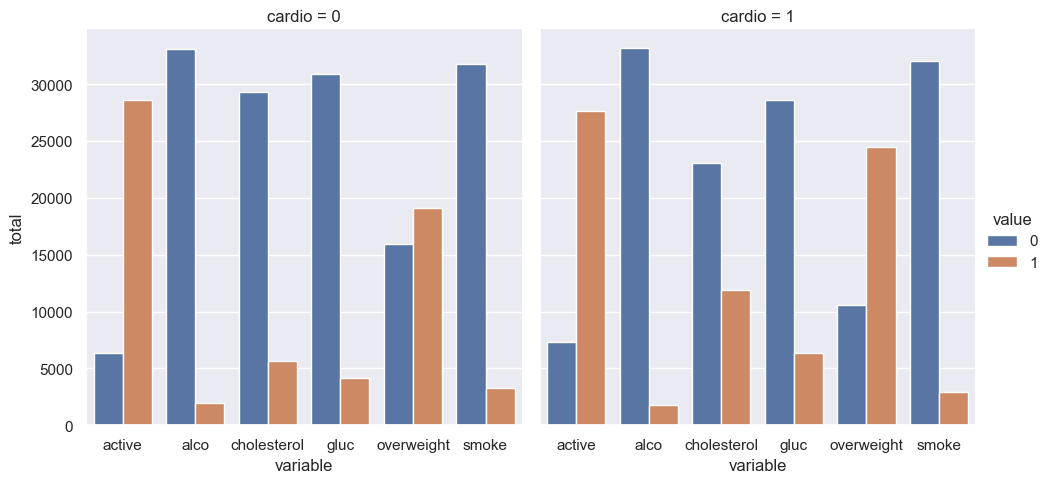

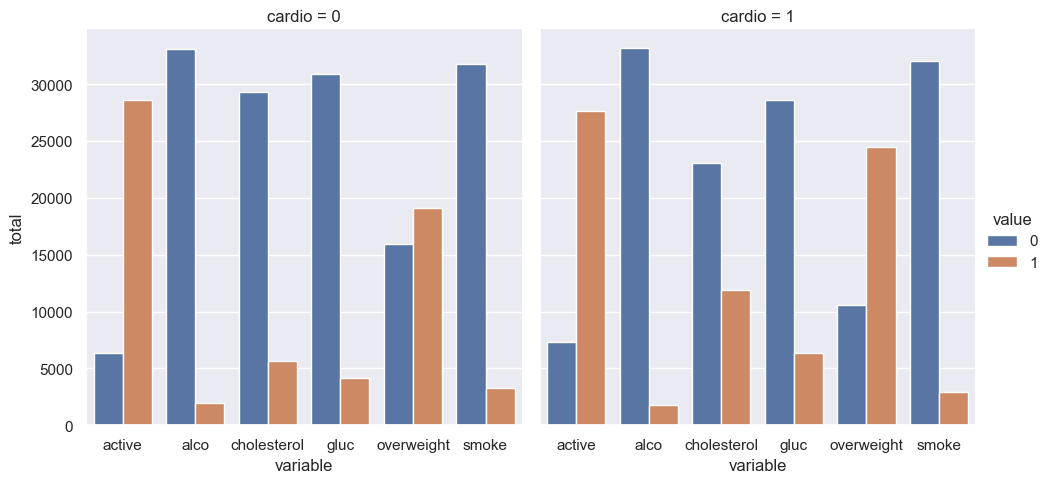

In [38]:
# Draw Categorical Plot
def draw_cat_plot():

    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol',
    # 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke',
    'alco','active', 'overweight'])

    df_cat["total"] = 1
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index = False).count()

    # Draw the catplot with 'sns.catplot()'
    #sns.set_theme(style="darkgrid")
    fig = sns.catplot(x= "variable", y = "total", data = df_cat,hue = "value", kind = "bar",
    col = "cardio").fig

     # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

cat_plot = draw_cat_plot()   #?????

### Draw Heat Map

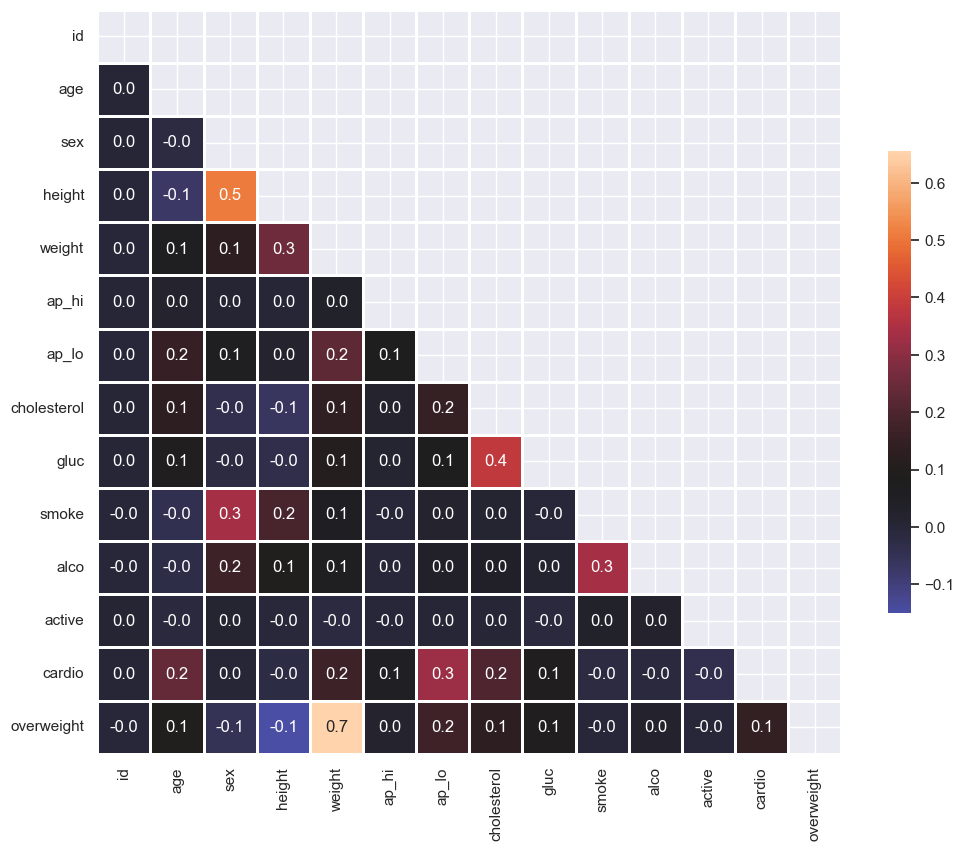

In [34]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df["ap_lo"] <= df["ap_hi"]) &
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr(method = "pearson")

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12,12))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt = '.1f',
                center = 0.08, cbar_kws = {"shrink":0.5})


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

heat_map = draw_heat_map()

In [36]:
def f():
    a = 1
    return a + 2
f()

3